In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('D3.csv')
df.head()

m = len(df)
num_vars = np.shape(df)[1] - 1

print(np.shape(df))
print(df)

(100, 4)
          X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]


In [3]:
X = df.values[:, 0:3]  # get x values
Y = df.values[:, 3]  # get y values

# stack 1s on left side of X
X = np.hstack( (np.ones((m, 1)) , X ) )  
              
print(X)
print(Y)

[[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]
 [1.         0.12121212 1.52484848 1.78545454]
 [1.         0.16161616 2.21979798 2.23393939]
 [1.         0.2020202  2.91474747 2.68242424]
 [1.         0.24242424 3.60969697 3.13090909]
 [1.         0.28282828 0.30464646 3.57939394]
 [1.         0.32323232 0.99959596 0.02787879]
 [1.         0.36363636 1.69454546 0.47636364]
 [1.         0.4040404  2.38949495 0.92484849]
 [1.         0.44444444 3.08444444 1.37333333]
 [1.         0.48484848 3.77939394 1.82181818]
 [1.         0.52525252 0.47434343 2.27030303]
 [1.         0.56565657 1.16929293 2.71878788]
 [1.         0.60606061 1.86424242 3.16727273]
 [1.         0.64646465 2.55919192 3.61575758]
 [1.         0.68686869 3.25414141 0.06424242]
 [1.         0.72727273 3.94909091 0.51272727]
 [1.         0.76767677 0.6440404  0.96121212]
 [1.         0.80808081 1.3389899  1.40969697]
 [1.         

Text(0.5, 1.0, 'Scatter plot of training data')

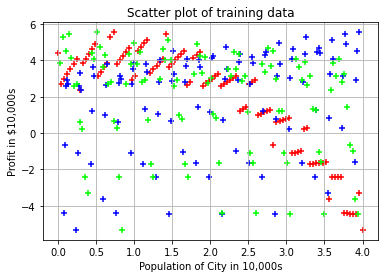

In [4]:
plt.scatter(X[:,1], Y, color='red'  , marker= '+') 
plt.scatter(X[:,2], Y, color='blue' , marker= '+')
plt.scatter(X[:,3], Y, color='lime' , marker= '+')
plt.grid() 
plt.rcParams["figure.figsize"] = (10,6) 
plt.xlabel('Population of City in 10,000s') 
plt.ylabel('Profit in $10,000s') 
plt.title('Scatter plot of training data')

# Was for fun with the data

In [5]:
theta = np.zeros(num_vars + 1)
print(theta)

[0. 0. 0. 0.]


In [6]:
def compute_cost(x, y, theta, debug:bool=False): 
    """ 
    Compute cost for linear regression. 

    Input Parameters 
    ---------------- 
    X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
    y : 1D array of labels/target value for each traing example. dimension(1 x m) 

    theta : 1D array of fitting parameters or weights. Dimension (1 x n) 

    Output Parameters 
    ----------------- 
    J : Scalar value. 
    """ 
    if(debug):
        print("x shape = ", np.shape(x))
        print("y shape = ", np.shape(y))
        print("theta shape = ", np.shape(theta))
        
    predictions = x.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum( sqrErrors ) 

    if(debug):
        print(sqrErrors)
        print(J)

    return J 

In [7]:
# Lets compute the cost for theta values 
cost = compute_cost(X, Y, theta, debug=True) 
print('The cost for given values of theta =', cost)

x shape =  (100, 4)
y shape =  (100,)
theta shape =  (4,)
[19.25055122  7.18052358  8.81193177 10.58893742 12.50594617 14.55742762
 16.73791531  5.58714761 14.69161966 16.80139086 19.02416606 21.35479865
 23.78820593  9.79840655 11.42373005 13.15002383 14.97246107 28.18857912
 30.75691938 14.28256044 16.07446959 17.94457135 19.88842261 21.90164427
  8.39220208  9.67630085 20.44085037 22.35749664 24.32780105 26.34776824
 11.09175326 12.422693   13.80475309 15.23419404 16.70734026 29.90511734
 13.29614534 14.5996883  15.93809787 17.30801828 18.70615777 20.12928847
  6.9950123   7.83879368 17.23491595 18.48949867 19.75911679  6.69277048
  7.42938651  8.1857575   8.95923124  9.74721952 10.54719805  6.60475245
  7.2308964   7.86706551  8.51099133  9.16046941  9.81335923  1.52612575
  1.78178742  2.04788296  7.42008965  7.91668661  8.41041937  0.96671945
  1.13018282  1.29895538  1.47153625  1.64648846  0.42252936  0.37642421
  0.45404148  0.53414587  0.61562022  0.69741136  1.24915605  1.15

In [8]:
# Test compute with subsection of values 
cost = compute_cost(X[:,1:2], Y, theta[1:2], debug=True) 
print('The cost for given values of theta =', cost)

x shape =  (100, 1)
y shape =  (100,)
theta shape =  (1,)
[19.25055122  7.18052358  8.81193177 10.58893742 12.50594617 14.55742762
 16.73791531  5.58714761 14.69161966 16.80139086 19.02416606 21.35479865
 23.78820593  9.79840655 11.42373005 13.15002383 14.97246107 28.18857912
 30.75691938 14.28256044 16.07446959 17.94457135 19.88842261 21.90164427
  8.39220208  9.67630085 20.44085037 22.35749664 24.32780105 26.34776824
 11.09175326 12.422693   13.80475309 15.23419404 16.70734026 29.90511734
 13.29614534 14.5996883  15.93809787 17.30801828 18.70615777 20.12928847
  6.9950123   7.83879368 17.23491595 18.48949867 19.75911679  6.69277048
  7.42938651  8.1857575   8.95923124  9.74721952 10.54719805  6.60475245
  7.2308964   7.86706551  8.51099133  9.16046941  9.81335923  1.52612575
  1.78178742  2.04788296  7.42008965  7.91668661  8.41041937  0.96671945
  1.13018282  1.29895538  1.47153625  1.64648846  0.42252936  0.37642421
  0.45404148  0.53414587  0.61562022  0.69741136  1.24915605  1.15

In [9]:
# Test computing with a different theta
cost = compute_cost(X, Y, np.array([1, 4, 6, 8]), debug=True) 
print('The cost for given values of theta =', cost)

x shape =  (100, 4)
y shape =  (100,)
theta shape =  (4,)
[ 431.49488627   40.95413801  196.83792641  469.30770885  858.51302749
 1364.60348633 1987.72875596  913.89090821   21.90774011  152.12206258
  399.61005868  764.52171728 1247.00709232  440.12911056  820.75293796
 1319.25736438 1935.7926999   341.39845187  684.32270642  140.31395062
  381.59827227  741.30555272 1219.5864856  1816.59182589  802.23063903
 1298.0976808   111.04594623  333.05557829  674.18390807 1134.58207556
  376.56680082  736.05672701 1215.12663727 1813.92792681 2532.61205674
  618.17672603  112.4558678   336.69120161  681.05540224 1145.70025067
 1730.77758923 2436.43932764 1233.50234542 1839.16336112  304.60542237
  636.23477235 1088.84856661  352.49992154  705.19574986 1179.18943121
 1774.63344713 2491.6803477  3330.48274192  106.23838054  327.87543667
  671.36575263 1136.86219541 1724.51769668 2434.4852505  1236.01173906
 1846.99494182 2580.60590955  646.47714545 1105.92363765 1688.24104423
  724.915552   1208

In [10]:
def gradient_descent(x, y, theta, alpha, iterations): 
    """ 
    Compute cost for linear regression. 

    Input Parameters 
    ---------------- 
    X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
    y : 1D array of labels/target value for each traing example. dimension(m x 1) 
    theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
    alpha : Learning rate. Scalar value 
    iterations: No of iterations. Scalar value.  

    Output Parameters 
    ----------------- 
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) """ 
    cost_history = np.zeros(iterations) 
    
    for i in range(iterations): 
        predictions = x.dot(theta) 
        errors = np.subtract(predictions, y) 
        sum_delta = (alpha / m) * x.transpose().dot(errors); 
        theta = theta - sum_delta; 
        cost_history[i] = compute_cost(x, y, theta)   
    
    return theta, cost_history 

In [26]:
iterations = 1000; 
alpha = 0.1; 

theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history) 

Final value of theta = [ 5.31416714 -2.00371926  0.53256334 -0.26560186]
cost_history = [0.73846427 0.73846427 0.73846427 0.73846427 0.73846427 0.73846427
 0.73846427 0.73846427 0.73846427 0.73846427 0.73846427 0.73846427
 0.73846427 0.73846427 0.73846427 0.73846427 0.73846427 0.73846426
 0.73846426 0.73846426 0.73846426 0.73846426 0.73846426 0.73846426
 0.73846426 0.73846426 0.73846426 0.73846426 0.73846426 0.73846426
 0.73846426 0.73846426 0.73846426 0.73846426 0.73846426 0.73846426
 0.73846426 0.73846426 0.73846426 0.73846426 0.73846426 0.73846426
 0.73846426 0.73846426 0.73846426 0.73846425 0.73846425 0.73846425
 0.73846425 0.73846425 0.73846425 0.73846425 0.73846425 0.73846425
 0.73846425 0.73846425 0.73846425 0.73846425 0.73846425 0.73846425
 0.73846425 0.73846425 0.73846425 0.73846425 0.73846425 0.73846425
 0.73846425 0.73846425 0.73846425 0.73846425 0.73846425 0.73846425
 0.73846425 0.73846425 0.73846425 0.73846425 0.73846425 0.73846425
 0.73846425 0.73846425 0.73846425 0.73846

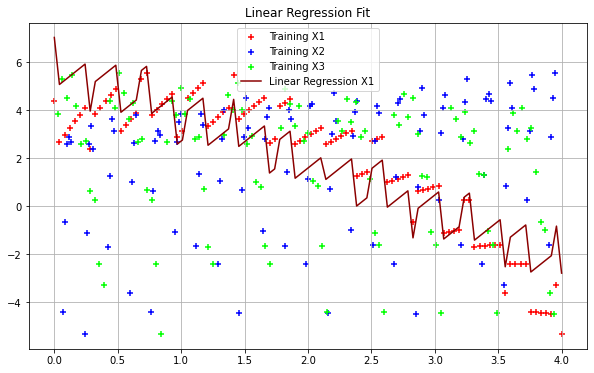

In [27]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X[:,1], Y, color='red'  , marker= '+', label= 'Training X1')  
plt.scatter(X[:,2], Y, color='blue' , marker= '+', label= 'Training X2')
plt.scatter(X[:,3], Y, color='lime' , marker= '+', label= 'Training X3')
plt.plot(X[:,1],X.dot(theta), color='darkRed', label='Linear Regression X1') 
# plt.plot(X[:,2],X.dot(theta), color='|darkBlue', label='Linear Regression X2') 
# plt.plot(X[:,3],X.dot(theta), color='Green', label='Linear Regression X2') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('') 
plt.ylabel('') 
plt.title('Linear Regression Fit') 
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent\ntheta_final = [ 5.31416714 -2.00371926  0.53256334 -0.26560186]\n')

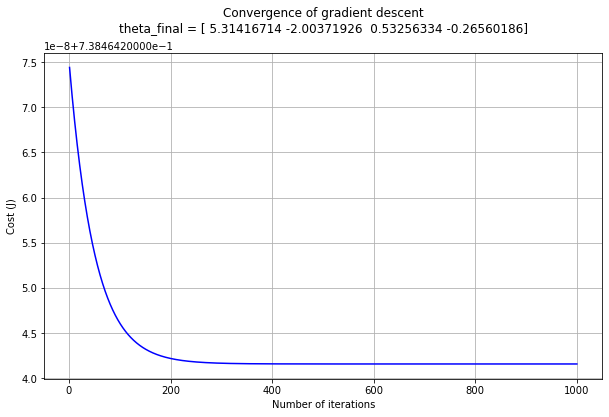

In [29]:
plt.plot(range(1, iterations + 1),cost_history, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title(f'Convergence of gradient descent\ntheta_final = {theta}\n') 

In [36]:
theta = [5.2, -2, 0.6, 0.2]
iterations = 2500; 
alpha = 0.01; 

theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history) 

Final value of theta = [ 5.29916069 -2.00159936  0.53504306 -0.26340222]
cost_history = [1.19210814 1.0916069  1.01709099 ... 0.73847629 0.73847626 0.73847624]


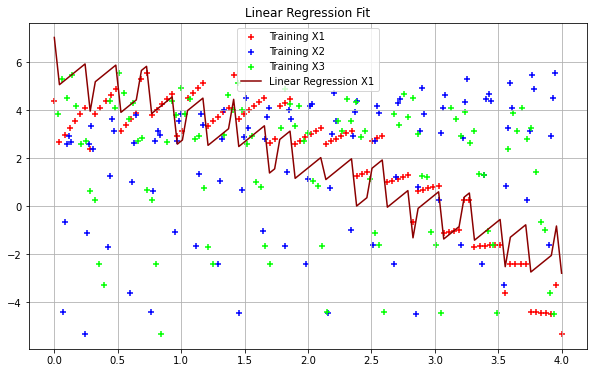

In [37]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X[:,1], Y, color='red'  , marker= '+', label= 'Training X1')  
plt.scatter(X[:,2], Y, color='blue' , marker= '+', label= 'Training X2')
plt.scatter(X[:,3], Y, color='lime' , marker= '+', label= 'Training X3')
plt.plot(X[:,1],X.dot(theta), color='darkRed', label='Linear Regression X1') 
# plt.plot(X[:,2],X.dot(theta), color='|darkBlue', label='Linear Regression X2') 
# plt.plot(X[:,3],X.dot(theta), color='Green', label='Linear Regression X2') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('') 
plt.ylabel('') 
plt.title('Linear Regression Fit') 
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent\ntheta_final = [ 5.29916069 -2.00159936  0.53504306 -0.26340222]')

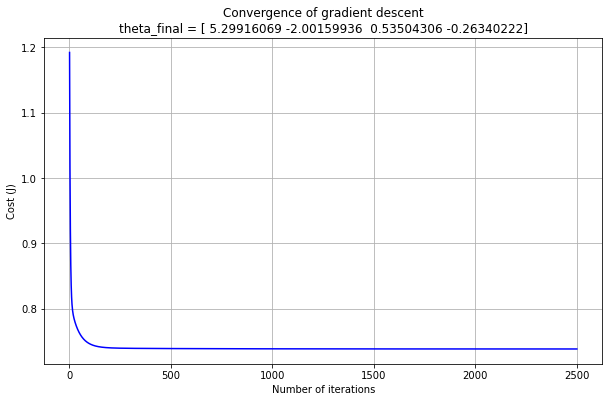

In [38]:
plt.plot(range(1, iterations + 1),cost_history, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title(f'Convergence of gradient descent\ntheta_final = {theta}')

In [61]:
theta = [5.3, -2, 0.55, -0.25]
iterations = 5000; 
alpha = 0.1; 

theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history) 

Final value of theta = [ 5.31416717 -2.00371927  0.53256334 -0.26560187]
cost_history = [0.73888237 0.73858196 0.73852241 ... 0.73846424 0.73846424 0.73846424]


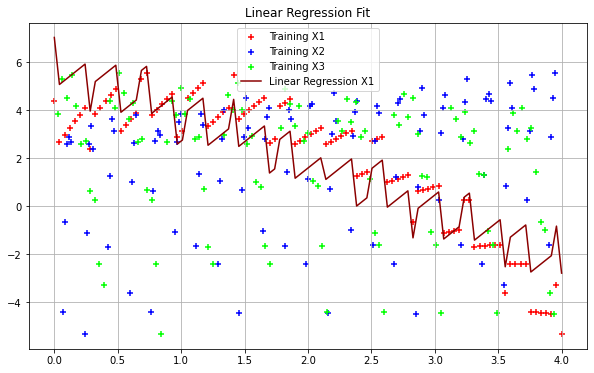

In [62]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X[:,1], Y, color='red'  , marker= '+', label= 'Training X1')  
plt.scatter(X[:,2], Y, color='blue' , marker= '+', label= 'Training X2')
plt.scatter(X[:,3], Y, color='lime' , marker= '+', label= 'Training X3')
plt.plot(X[:,1],X.dot(theta), color='darkRed', label='Linear Regression X1') 
# plt.plot(X[:,2],X.dot(theta), color='|darkBlue', label='Linear Regression X2') 
# plt.plot(X[:,3],X.dot(theta), color='Green', label='Linear Regression X2') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('') 
plt.ylabel('') 
plt.title('Linear Regression Fit') 
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent\ntheta_final = [ 5.31416717 -2.00371927  0.53256334 -0.26560187]')

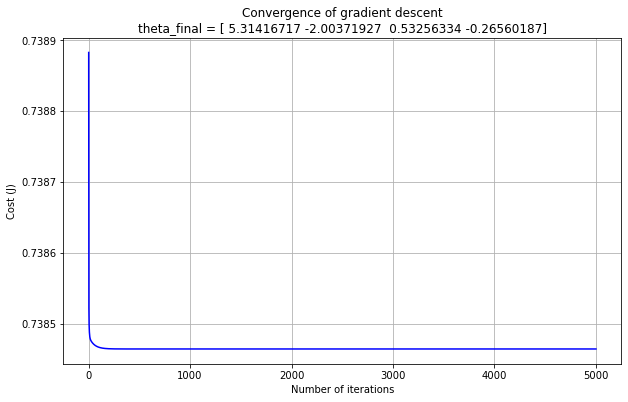

In [63]:
plt.plot(range(1, iterations + 1),cost_history, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title(f'Convergence of gradient descent\ntheta_final = {theta}')